In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime

import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

nltk.download(['punkt', 'stopwords', 'wordnet', 'averaged_perceptron_tagger'])

sns.set_style("darkgrid")

[nltk_data] Downloading package punkt to /home/nabanita/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nabanita/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/nabanita/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/nabanita/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
df = pd.read_csv("listings.csv")
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [3]:
del df["Unnamed: 0"]

In [4]:
df.shape

(2253, 15)

In [5]:
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [6]:
df.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object

In [7]:
df.nunique()

Job Title            1272
Salary Estimate        90
Job Description      2253
Rating                 37
Company Name         1513
Location              253
Headquarters          483
Size                    9
Founded               161
Type of ownership      15
Industry               89
Sector                 25
Revenue                14
Competitors           291
Easy Apply              2
dtype: int64

In [8]:
df['Rating'].unique()

array([ 3.2,  3.8,  3.4,  4.1,  3.9,  4.4,  3.7,  4. , -1. ,  3. ,  3.6,
        4.9,  3.3,  3.5,  5. ,  4.8,  4.7,  4.6,  2.9,  1. ,  3.1,  4.5,
        2.3,  4.2,  2.8,  4.3,  2.7,  2.5,  2.6,  2.4,  2. ,  2.1,  1.7,
        2.2,  1.8,  1.6,  1.9])

In [9]:
df['Founded'].unique()

array([1961, 1893, 2003, 2002, 2009, 2014, 2001, 1914, 1896, 2013, 1841,
         -1, 1884, 2004, 2016, 1996, 1958, 2006, 1998, 1969, 2011, 2017,
       2005, 1904, 2018, 1956, 2007, 1990, 1923, 2015, 1951, 1981, 2000,
       1966, 1939, 1999, 1812, 1945, 1985, 1984, 1962, 1995, 2012, 1967,
       1799, 1918, 1948, 1994, 1895, 1845, 1968, 2008, 1911, 1997, 1832,
       1934, 1938, 1963, 1992, 1977, 1886, 1862, 1906, 1993, 1935, 1971,
       1989, 1859, 1946, 1818, 1932, 1784, 1856, 1978, 1912, 1957, 1937,
       1982, 1964, 1850, 1983, 1869, 1947, 1868, 1936, 1853, 2010, 1902,
       1944, 1888, 1880, 1973, 1931, 1987, 2019, 1919, 1979, 1954, 1980,
       1976, 1872, 1926, 1991, 1855, 1959, 1986, 1890, 1882, 1883, 1837,
       1817, 1908, 1988, 1965, 1828, 1889, 1898, 1928, 1913, 1901, 1916,
       1857, 1955, 1949, 1970, 1822, 1972, 1864, 1975, 1960, 1885, 1922,
       1740, 1830, 1887, 1974, 1905, 1953, 1952, 1897, 1865, 1921, 1867,
       1933, 1874, 1891, 1807, 1870, 1892, 1852, 16

In [10]:
df.replace([-1.,-1, '-1', 'Unknown', 'Unknown / Non-Applicable'], np.nan, inplace=True)

In [11]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [12]:
df['Founded'].unique()

array([1961., 1893., 2003., 2002., 2009., 2014., 2001., 1914., 1896.,
       2013., 1841.,   nan, 1884., 2004., 2016., 1996., 1958., 2006.,
       1998., 1969., 2011., 2017., 2005., 1904., 2018., 1956., 2007.,
       1990., 1923., 2015., 1951., 1981., 2000., 1966., 1939., 1999.,
       1812., 1945., 1985., 1984., 1962., 1995., 2012., 1967., 1799.,
       1918., 1948., 1994., 1895., 1845., 1968., 2008., 1911., 1997.,
       1832., 1934., 1938., 1963., 1992., 1977., 1886., 1862., 1906.,
       1993., 1935., 1971., 1989., 1859., 1946., 1818., 1932., 1784.,
       1856., 1978., 1912., 1957., 1937., 1982., 1964., 1850., 1983.,
       1869., 1947., 1868., 1936., 1853., 2010., 1902., 1944., 1888.,
       1880., 1973., 1931., 1987., 2019., 1919., 1979., 1954., 1980.,
       1976., 1872., 1926., 1991., 1855., 1959., 1986., 1890., 1882.,
       1883., 1837., 1817., 1908., 1988., 1965., 1828., 1889., 1898.,
       1928., 1913., 1901., 1916., 1857., 1955., 1949., 1970., 1822.,
       1972., 1864.,

In [13]:
df['Rating'].unique()

array([3.2, 3.8, 3.4, 4.1, 3.9, 4.4, 3.7, 4. , nan, 3. , 3.6, 4.9, 3.3,
       3.5, 5. , 4.8, 4.7, 4.6, 2.9, 1. , 3.1, 4.5, 2.3, 4.2, 2.8, 4.3,
       2.7, 2.5, 2.6, 2.4, 2. , 2.1, 1.7, 2.2, 1.8, 1.6, 1.9])

In [14]:
null_percentage = df.isnull().sum().sort_values(ascending=False)/len(df)*100

In [88]:
#null_percentage

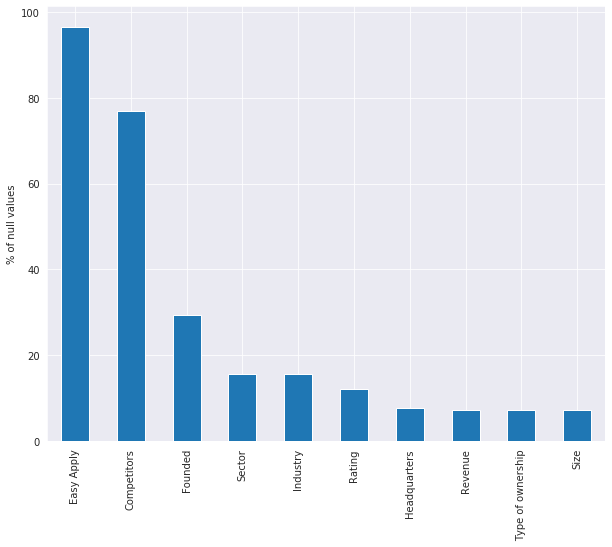

In [15]:
null_percentage[null_percentage>0.1].plot(kind='bar', figsize=(10,8))
plt.ylabel("% of null values");

In [16]:
df.drop(['Easy Apply', 'Competitors'], axis=1, inplace=True)

In [17]:
df['low_salary'] = df['Salary Estimate'].apply(lambda x:float(x.split()[0].split("-")[0].strip("$,K")) 
                                                          if not pd.isnull(x) else x)
df['up_salary'] = df['Salary Estimate'].apply(lambda x:float(x.split()[0].split("-")[1].strip("$,K")) 
                                                          if not pd.isnull(x) else x)
df['avg_salary'] = (df['low_salary'] + df['up_salary'])/2.

In [18]:
df['up_salary'].unique()

array([ 66.,  87.,  88.,  85.,  76., 110.,  78., 127.,  90.,  52.,  74.,
       132., 114.,  96.,  47.,  59.,  81.,  69., 112.,  54., 103.,  70.,
        45.,  63.,  82.,  92., 129.,  38., 123.,  94., 102.,  68.,  44.,
       113.,  93.,  89., 122., 124.,  61.,  48.,  53.,  86., 190., 151.,
       116., 104.,  42.,  77.,  72.,  67.,  75.,  99., 178., 159., 120.,
       101.,  nan,  56.,  91., 100.])

In [19]:
df.drop('Salary Estimate', axis=1, inplace=True)

In [14]:
#find_str = 'analyst'
#df['Job Title'] = df['Job Title'].apply(lambda x:x[:(x.lower()).find(find_str)+len(find_str)].lower())

In [20]:
row_null_percentage = df.isnull().sum(axis=1).sort_values(ascending=False)/len(df)*100
row_null_percentage

1860    0.399467
1789    0.355082
2131    0.355082
1756    0.355082
355     0.355082
          ...   
1368    0.000000
1370    0.000000
1371    0.000000
1372    0.000000
0       0.000000
Length: 2253, dtype: float64

In [22]:
#df['Industry'].value_counts()[:20]

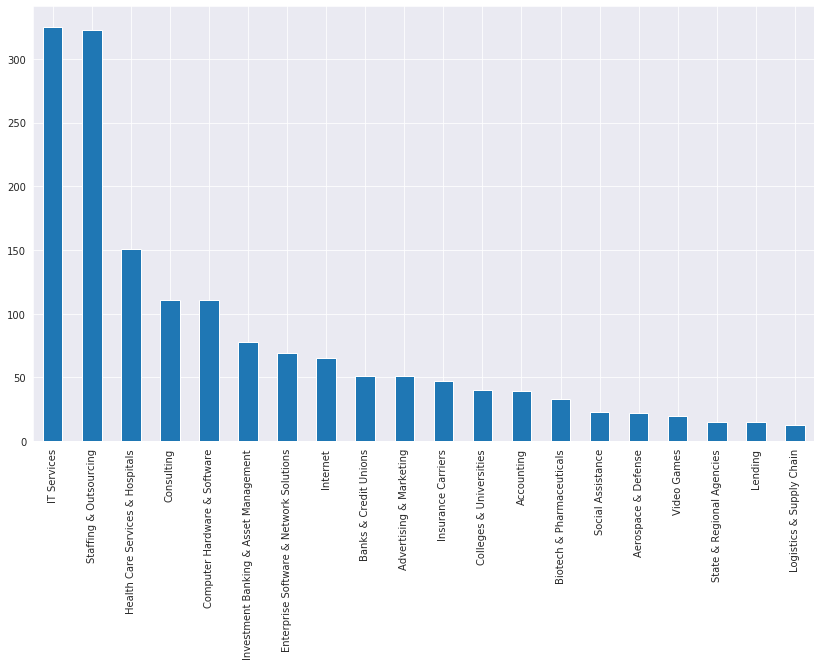

In [21]:
df['Industry'].value_counts()[:20].plot(kind='bar', figsize=(14,8))

In [52]:
#df['Industry'].value_counts()[:20]

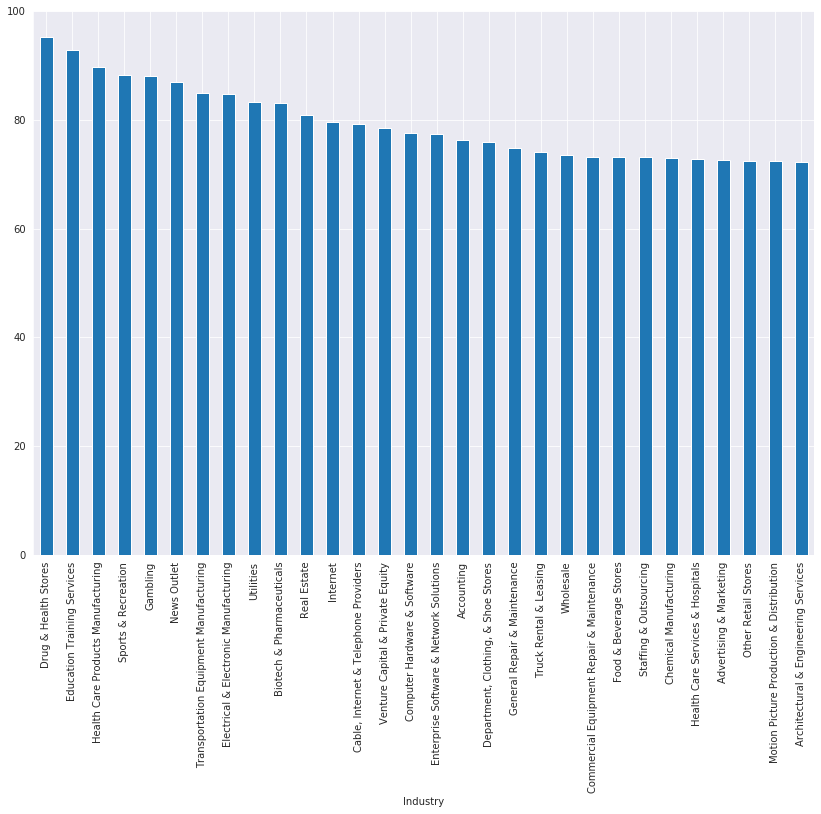

In [51]:
df.groupby('Industry')['avg_salary'].mean().sort_values(ascending=False)[:30].plot(kind='bar', figsize=(14,10))

In [26]:
df['Company Name'].unique()[:20]

array(['Vera Institute of Justice\n3.2',
       'Visiting Nurse Service of New York\n3.8', 'Squarespace\n3.4',
       'Celerity\n4.1', 'FanDuel\n3.9', 'Point72\n3.9', 'Two Sigma\n4.4',
       'GNY Insurance Companies\n3.7', 'DMGT\n4.0', 'Riskified\n4.4',
       'NYU Langone Health\n4.0', 'BulbHead', 'Montefiore Medical\n3.7',
       'Known\n3.0', 'Advisor Group\n3.4', 'CodeGreen Solutions\n3.6',
       'Undertone\n3.8', 'NYSTEC\n3.8',
       'Education Development Center, Inc.\n3.9',
       'Teachers Pay Teachers\n4.9'], dtype=object)

In [28]:
df['Company Name'] = df['Company Name'].apply(lambda x:x.split("\n")[0].strip() 
                                                       if not pd.isnull(x) else x)

In [30]:
df['Company Name'].unique()[:50]

array(['Vera Institute of Justice', 'Visiting Nurse Service of New York',
       'Squarespace', 'Celerity', 'FanDuel', 'Point72', 'Two Sigma',
       'GNY Insurance Companies', 'DMGT', 'Riskified',
       'NYU Langone Health', 'BulbHead', 'Montefiore Medical', 'Known',
       'Advisor Group', 'CodeGreen Solutions', 'Undertone', 'NYSTEC',
       'Education Development Center, Inc.', 'Teachers Pay Teachers',
       'Google', 'MUSIC & Entertainment', 'Macquarie Group', 'Andiamo',
       'Dash Technologies Inc', 'Hearst Communications', 'Duolingo', 'Ro',
       'Endai', 'BlueLabs', 'Revel', 'NALLAS CORPORATION', 'Pozent',
       'SoFi', 'Carry1st', 'Bank of America', 'Clear Street',
       'Nutech Information Systems', 'The Trevor Project', 'Pinto',
       'AB InBev', 'Whip Media Group', 'Two95 International Inc.',
       'Vettery', 'Nesco Resource, LLC', 'MediaMath', 'Jordan & Jordan',
       'Roku', 'Walt Disney Co.', 'Citadel'], dtype=object)

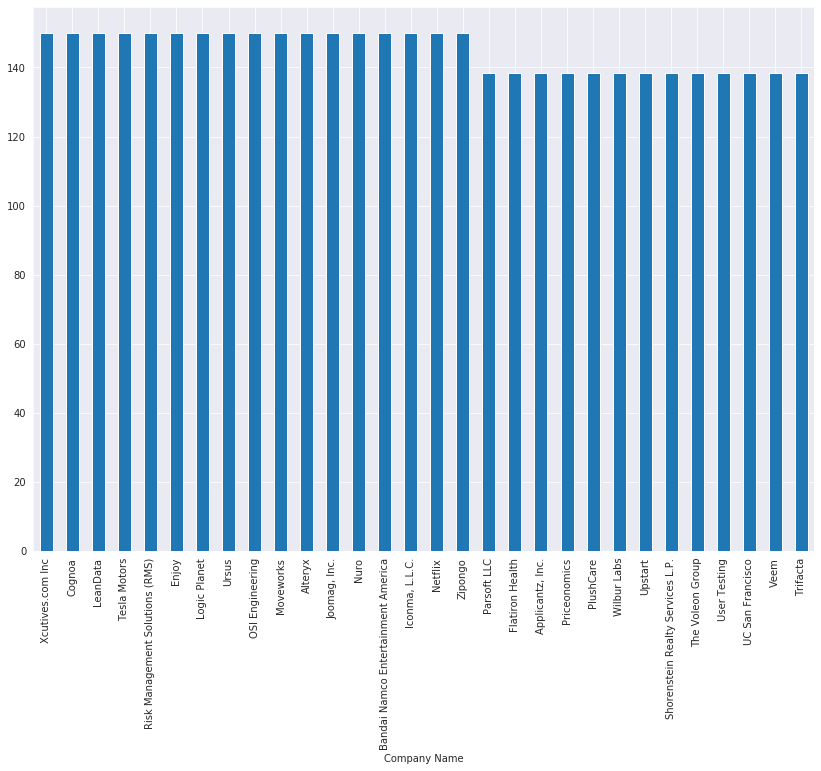

In [108]:
df.groupby('Company Name')['avg_salary'].mean().sort_values(ascending=False)[:30].plot(kind='bar', figsize=(14,10))

In [57]:
top_30_comps = list(df.groupby('Company Name')['avg_salary'].mean().sort_values(ascending=False)[:30].index)

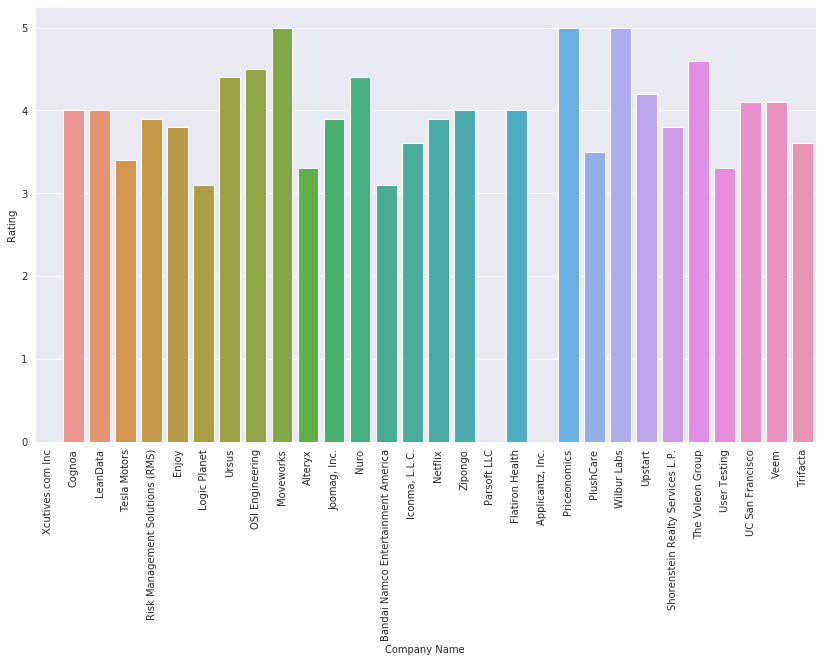

In [82]:
plt.figure(figsize=(14,8))
sns.barplot(x=df[df['Company Name'].isin(top_30_comps)]['Company Name'], 
            y=df[df['Company Name'].isin(top_30_comps)]['Rating'],
            order = top_30_comps)
plt.xticks(rotation=90);

In [86]:
df['Size'].unique()

array(['201 to 500 employees', '10000+ employees',
       '1001 to 5000 employees', '501 to 1000 employees',
       '5001 to 10000 employees', '1 to 50 employees',
       '51 to 200 employees', 'Unknown', nan], dtype=object)

In [87]:
df.replace('Unknown', np.nan, inplace=True)

In [88]:
df['Size'].unique()

array(['201 to 500 employees', '10000+ employees',
       '1001 to 5000 employees', '501 to 1000 employees',
       '5001 to 10000 employees', '1 to 50 employees',
       '51 to 200 employees', nan], dtype=object)

In [93]:
df['Size'] = df['Size'].apply(lambda x:re.sub('employees', '', x).strip() if not pd.isnull(x) else x)

In [94]:
df['Size'].unique()

array(['201 to 500', '10000+', '1001 to 5000', '501 to 1000',
       '5001 to 10000', '1 to 50', '51 to 200', nan], dtype=object)

In [95]:
group_dict = {'1 to 50':'grp_1', '51 to 200':'grp_2', '201 to 500':'grp_3', '501 to 1000':'grp_4',
              '1001 to 5000':'grp_5', '5001 to 10000':'grp_6', '10000+':'grp_7'}
df['Size'] = df['Size'].map(group_dict)

In [96]:
df['Size'].unique()

array(['grp_3', 'grp_7', 'grp_5', 'grp_4', 'grp_6', 'grp_1', 'grp_2', nan],
      dtype=object)

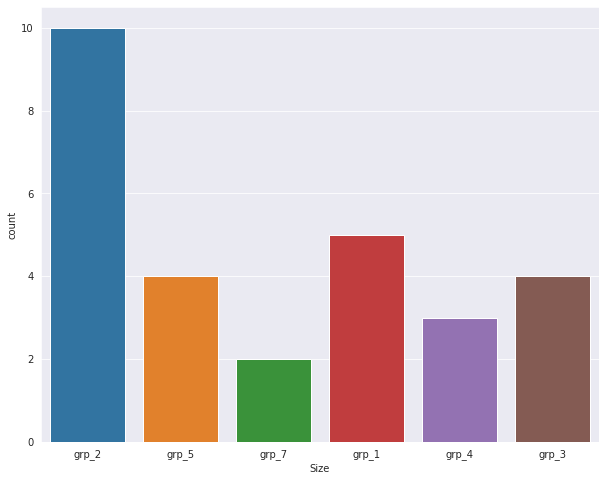

In [118]:
plt.figure(figsize=(10,8))
sns.countplot(df[df['Company Name'].isin(top_30_comps)]['Size'])        

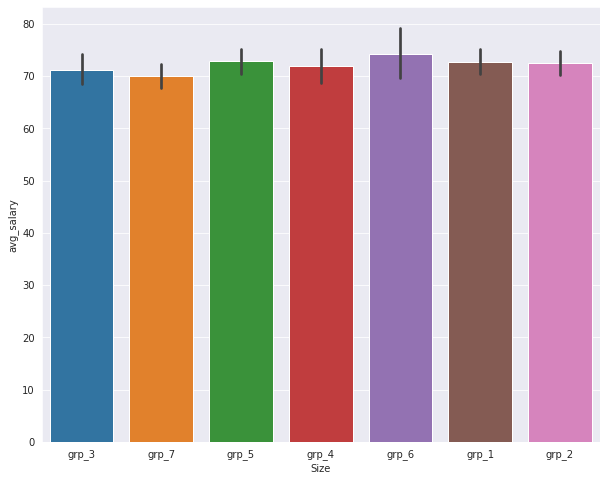

In [122]:
# put this plot above
plt.figure(figsize=(10,8))
sns.barplot(x='Size', y='avg_salary', data=df)

In [123]:
df['Revenue']

0       $100 to $500 million (USD)
1           $2 to $5 billion (USD)
2         Unknown / Non-Applicable
3        $50 to $100 million (USD)
4       $100 to $500 million (USD)
                   ...            
2248      Unknown / Non-Applicable
2249            $10+ billion (USD)
2250                           NaN
2251      $25 to $50 million (USD)
2252        $2 to $5 billion (USD)
Name: Revenue, Length: 2253, dtype: object

In [124]:
df.replace('Unknown / Non-Applicable', np.nan, inplace=True)

In [127]:
df['Revenue'].unique()

array(['$100 to $500 million (USD)', '$2 to $5 billion (USD)', nan,
       '$50 to $100 million (USD)', '$1 to $2 billion (USD)',
       '$5 to $10 billion (USD)', '$1 to $5 million (USD)',
       '$25 to $50 million (USD)', '$10+ billion (USD)',
       'Less than $1 million (USD)', '$10 to $25 million (USD)',
       '$500 million to $1 billion (USD)', '$5 to $10 million (USD)'],
      dtype=object)

In [131]:
df['Revenue'] = df['Revenue'].apply(lambda x:x.split("(")[0].strip() if not pd.isnull(x) else x)

In [132]:
df['Revenue'].unique()

array(['$100 to $500 million', '$2 to $5 billion', nan,
       '$50 to $100 million', '$1 to $2 billion', '$5 to $10 billion',
       '$1 to $5 million', '$25 to $50 million', '$10+ billion',
       'Less than $1 million', '$10 to $25 million',
       '$500 million to $1 billion', '$5 to $10 million'], dtype=object)

In [142]:
df[df['Company Name'].isin(top_30_comps)]['Revenue'].unique()

array(['$25 to $50 million', '$100 to $500 million', '$10 to $25 million',
       '$2 to $5 billion', nan, '$5 to $10 million', '$5 to $10 billion',
       '$1 to $5 million', '$50 to $100 million', 'Less than $1 million'],
      dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

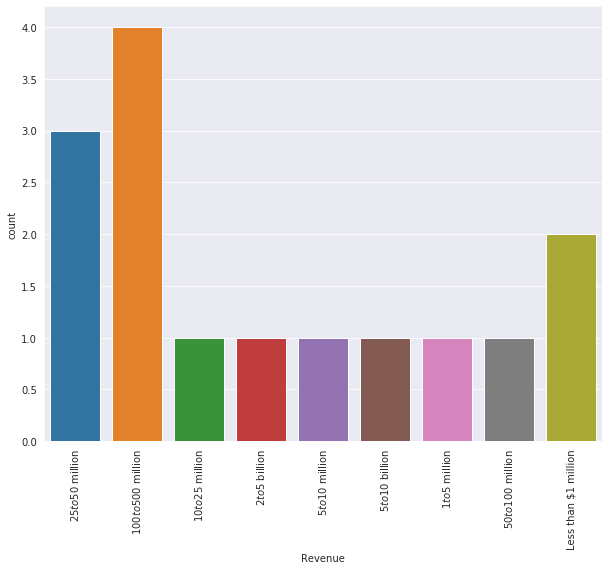

In [152]:
plt.figure(figsize=(10,8))
sns.countplot(df[df['Company Name'].isin(top_30_comps)]['Revenue'])    
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

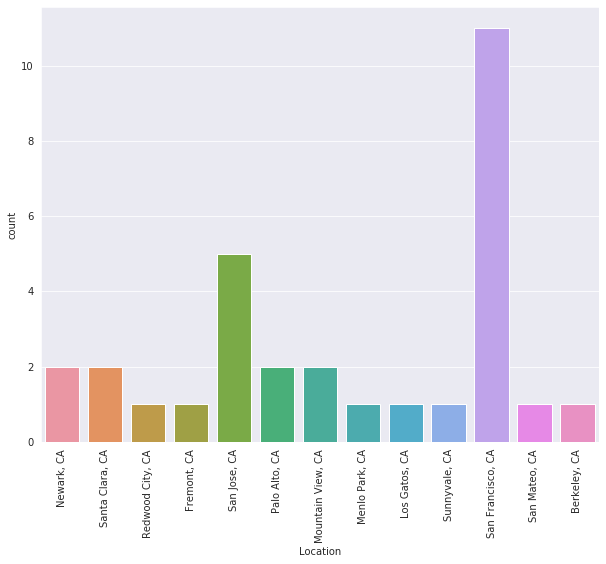

In [189]:
plt.figure(figsize=(10,8))
sns.countplot(df[df['Company Name'].isin(top_30_comps)]['Location'])    
plt.xticks(rotation=90)

In [153]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'low_salary', 'up_salary', 'avg_salary'],
      dtype='object')

Text(0, 0.5, 'rating')

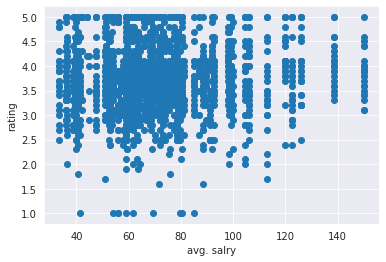

In [158]:
plt.scatter(x='avg_salary', y='Rating', data=df)
plt.xlabel('avg. salry')
plt.ylabel('rating')

In [159]:
df['Founded']

0       1961.0
1       1893.0
2       2003.0
3       2002.0
4       2009.0
         ...  
2248       NaN
2249    1935.0
2250       NaN
2251    1984.0
2252    1864.0
Name: Founded, Length: 2253, dtype: float64

In [168]:
current_year = datetime.datetime.now().year

In [172]:
df['Company_age'] = current_year - df['Founded']
df['Company_age']

0        59.0
1       127.0
2        17.0
3        18.0
4        11.0
        ...  
2248      NaN
2249     85.0
2250      NaN
2251     36.0
2252    156.0
Name: Company_age, Length: 2253, dtype: float64

In [174]:
df.drop('Founded', axis=1, inplace=True)

Text(0, 0.5, 'company age')

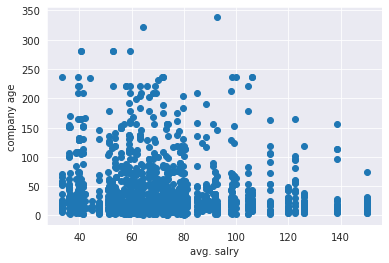

In [175]:
plt.scatter(x='avg_salary', y='Company_age', data=df)
plt.xlabel('avg. salry')
plt.ylabel('company age')

In [176]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector',
       'Revenue', 'low_salary', 'up_salary', 'avg_salary', 'Company_age'],
      dtype='object')

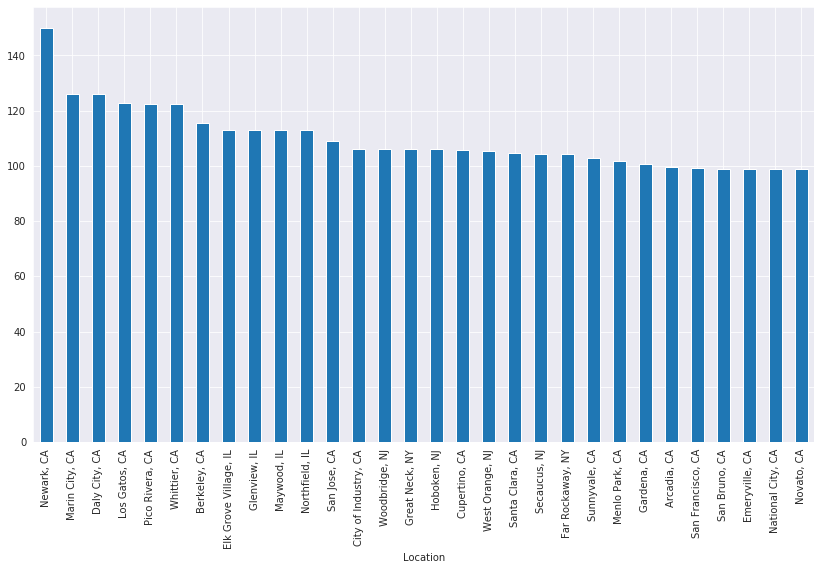

In [186]:
df.groupby('Location')['avg_salary'].mean().sort_values(ascending=False)[:30].plot(kind='bar', figsize=(14,8))

In [188]:
#df.groupby('Location')['Rating'].mean().sort_values(ascending=False)[:30].plot(kind='bar', figsize=(14,8))

In [190]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector',
       'Revenue', 'low_salary', 'up_salary', 'avg_salary', 'Company_age'],
      dtype='object')

In [4]:
description_text = df['Job Description']

In [5]:
description_text

0       Are you eager to roll up your sleeves and harn...
1       Overview\n\nProvides analytical and technical ...
2       We’re looking for a Senior Data Analyst who ha...
3       Requisition NumberRR-0001939\nRemote:Yes\nWe c...
4       ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...
                              ...                        
2248    Maintains systems to protect data from unautho...
2249    Position:\nSenior Data Analyst (Corporate Audi...
2250    Title: Technical Business Analyst (SQL, Data a...
2251    Summary\n\nResponsible for working cross-funct...
2252    You.\n\nYou bring your body, mind, heart and s...
Name: Job Description, Length: 2253, dtype: object

In [47]:
def text_to_word(text):

    word_list =  word_tokenize(re.sub(r"[^a-z]", " ", text.lower()))
    word_nostop_list = [word for word in word_list if word not in stopwords.words("english")]
    pos_dict = {"N":wordnet.NOUN, "J":wordnet.ADJ} # "V":wordnet.VERB, , , "R":wordnet.ADV
    
    lemm_token_list = set()
    for token,pos_tag in nltk.pos_tag(word_nostop_list):
        try:
            lemm_token_list.add(WordNetLemmatizer().lemmatize(token, pos=pos_dict[pos_tag[0]]))
        except:
            pass

    
    clean_text = ' '.join(lemm_token_list)
        
    return clean_text

In [48]:
df['cleaned_description'] = df['Job Description'].apply(lambda x:text_to_word(x))

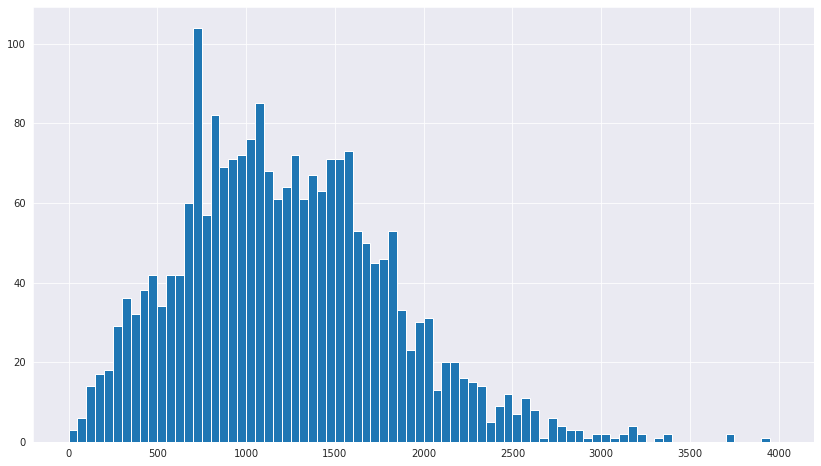

In [49]:
desc_len = [len(desc) for desc in df['cleaned_description']]
plt.figure(figsize=(14,8))
plt.hist(desc_len, bins=80, range=(0,4000));

In [30]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white', max_words=500, max_font_size=40, 
                      random_state=22).generate(str(df['cleaned_description']))

(-0.5, 399.5, 199.5, -0.5)

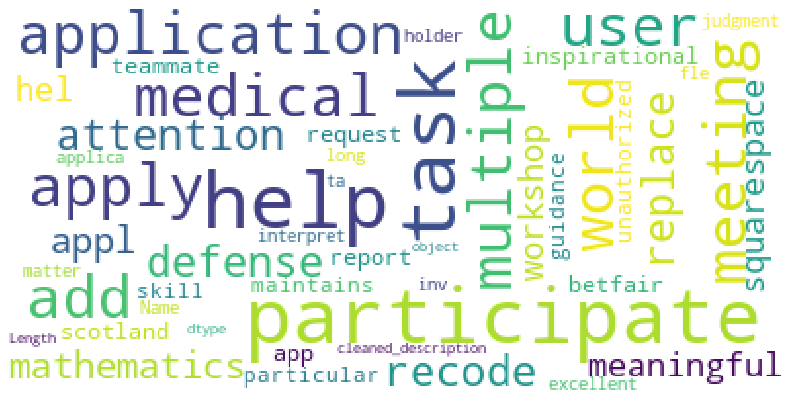

In [33]:
plt.figure(figsize=(14,8))
plt.imshow(wordcloud)
plt.axis("off")

In [50]:
count_vect = CountVectorizer(ngram_range=(1,1)).fit(df['cleaned_description'])
df_matrix = count_vect.transform(df['cleaned_description'])

In [44]:
df_matrix.shape

(2253, 10029)

In [33]:
sum_words = df_matrix.sum(axis=0)/df_matrix.shape[0]
sum_words

matrix([[0.01109632, 0.00044385, 0.00088771, ..., 0.00044385, 0.00044385,
         0.00133156]])

In [60]:
sum_words = df_matrix.sum(axis=0)
sum_words

matrix([[28,  1,  1, ...,  1,  1,  3]], dtype=int64)

In [12]:
count_vect.vocabulary_

{'part': 10104,
 'court': 3155,
 'parent': 10085,
 'step': 13262,
 'study': 13369,
 'initiative': 7084,
 'faxed': 5272,
 'monitor': 8997,
 'administers': 255,
 'policy': 10562,
 'partner': 10117,
 'affect': 332,
 'year': 15415,
 'vision': 14939,
 'address': 223,
 'st': 13155,
 'submission': 13390,
 'connect': 2891,
 'trend': 14284,
 'analyst': 592,
 'transformative': 14236,
 'leader': 7952,
 'disability': 3991,
 'immigration': 6815,
 'coordinate': 3055,
 'technical': 13783,
 'responsibility': 11843,
 'institute': 7154,
 'innovative': 7099,
 'extend': 5150,
 'basis': 1288,
 'stakeholder': 13175,
 'analysis': 579,
 'globally': 5954,
 'sex': 12550,
 'independent': 6946,
 'recur': 11468,
 'close': 2458,
 'evidence': 4979,
 'effort': 4481,
 'eager': 4347,
 'www': 15372,
 'modify': 8962,
 'youll': 15451,
 'use': 14707,
 'enthusiasm': 4746,
 'list': 8142,
 'engineer': 4694,
 'harness': 6249,
 'program': 10929,
 'military': 8843,
 'center': 2155,
 'universal': 14582,
 'support': 13523,
 'emplo

In [51]:
# get top 10 unigrams

def top_n_unigram(document, n):
    
    count_vect = CountVectorizer(ngram_range=(1,1))
    dt_matrix = count_vect.fit_transform(document)
    
    word_freq = dt_matrix.sum(axis=0)/df_matrix.shape[0]
    word_freq_list = [(word, word_freq[0, index]) for word, index in count_vect.vocabulary_.items()]
    word_freq_list = sorted(word_freq_list, key=lambda x:x[1], reverse=True)
    
    return word_freq_list[:n]

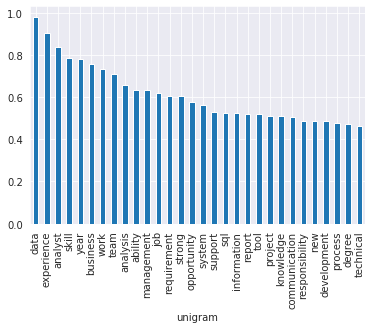

In [52]:
top_unigrams = top_n_unigram(df['cleaned_description'], 30)
df2 = pd.DataFrame(top_unigrams, columns = ['unigram' , 'count'])
df2.set_index('unigram', inplace=True)
df2['count'].plot(kind='bar')

In [53]:
lda = LatentDirichletAllocation()
new_mat = lda.fit_transform(df_matrix)

In [37]:
new_mat.shape

(2253, 10)

In [26]:
#lda.components_

In [54]:
keywords = np.array(count_vect.get_feature_names())

In [26]:
keywords.shape

(15506,)

In [55]:
topic_keywords = []

for topic_weights in lda.components_:
    top_keyword_locs = (-topic_weights).argsort()[:5]
    topic_keywords.append(keywords.take(top_keyword_locs))
    
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords

,0,1,2,3,4
0,data,experience,year,analysis,benefit
1,service,data,year,analyst,business
2,data,analyst,experience,skill,year
3,data,job,support,analyst,experience
4,race,sexual,origin,orientation,disability
5,year,member,team,analyst,responsibility
6,data,report,experience,year,system
7,data,experience,analyst,business,team
8,team,year,data,work,experience
9,data,experience,business,skill,strong


In [61]:
df['Location'] = df['Location'].apply(lambda x:x.split(",")[1])
df['Location']

0        NY
1        NY
2        NY
3        NY
4        NY
       ... 
2248     CO
2249     CO
2250     CO
2251     CO
2252     CO
Name: Location, Length: 2253, dtype: object

In [62]:
df['Location'].unique()

array([' NY', ' NJ', ' UT', ' CA', ' VA', ' FL', ' IL', ' TX', ' AZ',
       ' PA', ' DE', ' OH', ' NC', ' SC', ' IN', ' WA', ' GA', ' KS',
       ' CO', ' Arapahoe'], dtype=object)